In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
dataset = pd.read_csv("Data.csv")

description = dataset.describe()

print(f"Description: \n{description}\n")

print(dataset)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

Description: 
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
95

In [43]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

decision_tree_regression_model = DecisionTreeRegressor(random_state=0)
decision_tree_regression_model.fit(X_train, y_train)

random_forest_regression_model = RandomForestRegressor(n_estimators=10, random_state=0)
random_forest_regression_model.fit(X_train, y_train)

def evaluate(model, name, X, y):
    y_predicted = model.predict(X)
    R2 = r2_score(y_true=y, y_pred=y_predicted)
    MSE = mean_squared_error(y_true=y, y_pred=y_predicted)
    print(f"Model: {name}")
    print(f"R2: {R2}")
    print(f"MSE: {MSE}")
    return R2, MSE
    
r2_linear_regression, MSE_linear_regression = evaluate(linear_regression_model, "Linear Regression", X, y)
print("")
r2_decision_tree_regression, MSE_decision_tree_regression = evaluate(decision_tree_regression_model, "Decision Tree Regression", X, y)
print("")
r2_random_forest_regression, MSE_random_forest_regression = evaluate(random_forest_regression_model, "Random Forest Regression", X, y)

Model: Linear Regression
R2: 0.9286852433341509
MSE: 20.770556589618906

Model: Decision Tree Regression
R2: 0.9761572000823577
MSE: 6.9442601797658865

Model: Random Forest Regression
R2: 0.9797123606169567
MSE: 5.908813008361203


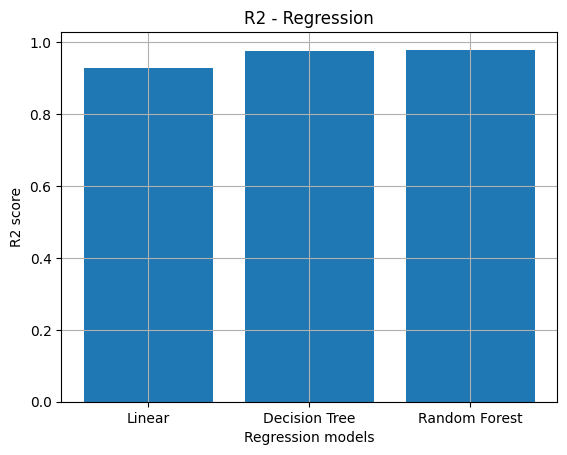

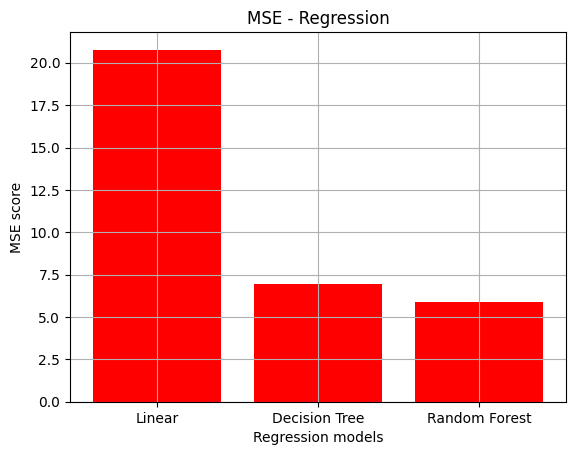

In [48]:
plt.bar(
    ["Linear", "Decision Tree", "Random Forest"],
    [r2_linear_regression, r2_decision_tree_regression, r2_random_forest_regression]
)
plt.grid(True)
plt.title("R2 - Regression")
plt.xlabel("Regression models")
plt.ylabel("R2 score")
plt.show()

plt.bar(
    ["Linear", "Decision Tree", "Random Forest"],
    [MSE_linear_regression, MSE_decision_tree_regression, MSE_random_forest_regression],
    color="red"
)
plt.grid(True)
plt.title("MSE - Regression")
plt.xlabel("Regression models")
plt.ylabel("MSE score")
plt.show()